Bilangan acak uniform:
[0.63 0.29 0.39 0.4  0.56 0.08 0.78 0.6  0.24 0.19 0.71 0.78 0.39 0.68
 0.92 0.69 0.45 0.6  0.73 0.44 0.63 1.   0.78 0.58 0.88 0.3  0.4  0.37
 0.4  0.33 0.29 0.78 0.36 0.02 0.61 0.72 0.79 0.71 0.32 0.22 0.41 0.96
 0.09 0.55 0.32 0.76 0.08 0.54 0.1  0.94]
Waktu antar kejadian:
[ 2.28  6.27  4.67  4.59  2.88 12.63  1.23  2.55  7.09  8.43  1.7   1.26
  4.72  1.94  0.4   1.82  4.03  2.53  1.56  4.16  2.28  0.02  1.27  2.75
  0.64  5.99  4.59  4.96  4.56  5.61  6.27  1.26  5.08 18.55  2.44  1.66
  1.19  1.72  5.62  7.48  4.49  0.22 11.91  3.    5.68  1.35 12.67  3.09
 11.7   0.32]

Waktu kumulatif kejadian:
[  2.28   8.56  13.23  17.82  20.69  33.33  34.55  37.1   44.19  52.63
  54.33  55.59  60.31  62.25  62.64  64.46  68.49  71.02  72.58  76.74
  79.02  79.03  80.3   83.06  83.69  89.68  94.27  99.23 103.79 109.4
 115.67 116.93 122.01 140.55 142.99 144.65 145.84 147.56 153.19 160.66
 165.15 165.37 177.28 180.28 185.96 187.31 199.98 203.07 214.77 215.09]


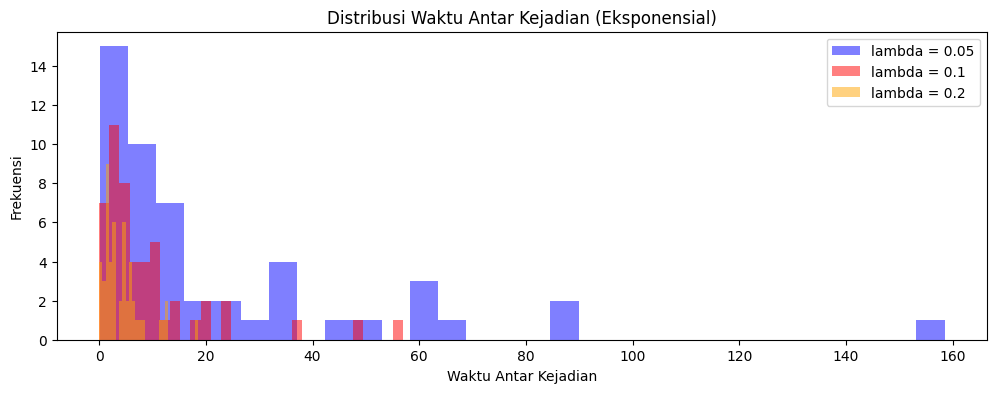

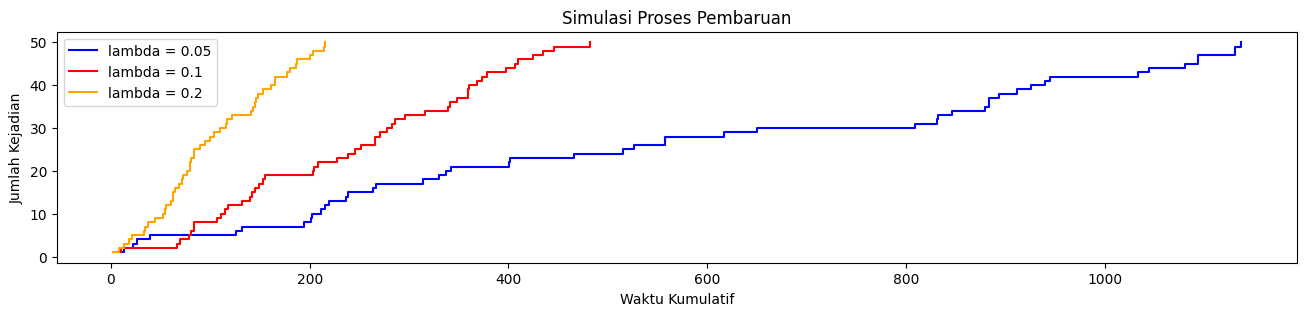

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter distribusi eksponensial
data_lambda = [0.05, 0.1, 0.2]  # Tiga nilai lambda
n_samples = 50  # Jumlah sampel

# Warna untuk plot
colors = ['blue', 'red', 'orange']

# Membuat figure untuk plot distribusi
plt.figure(figsize=(12, 4))
plt.title("Distribusi Waktu Antar Kejadian (Eksponensial)")
plt.xlabel("Waktu Antar Kejadian")
plt.ylabel("Frekuensi")

# Membuat figure untuk plot proses pembaruan
plt.figure(figsize=(16, 3))
plt.title("Simulasi Proses Pembaruan")
plt.xlabel("Waktu Kumulatif")
plt.ylabel("Jumlah Kejadian")

# Simulasi untuk setiap nilai lambda
for i, lambda_param in enumerate(data_lambda):
    # Menghasilkan waktu antar kegagalan
    U = np.random.uniform(0, 1, n_samples)  # Bilangan acak uniform
    X = -1 / lambda_param * np.log(U)  # Waktu antar kegagalan

    # Simulasi proses pembaruan
    renewal_times = np.cumsum(X)  # Waktu kumulatif kegagalan
    events = np.arange(1, n_samples + 1)  # Jumlah kejadian (1, 2, ..., n_samples)

    # Plot distribusi waktu antar kegagalan
    plt.figure(1)
    plt.hist(X, bins=30, alpha=0.5, label=f"lambda = {lambda_param}", color=colors[i])

    # Plot proses pembaruan
    plt.figure(2)
    plt.step(renewal_times, events, where="post", label=f"lambda = {lambda_param}", color=colors[i])

# Menampilkan data
print("Bilangan acak uniform:")
print(U.round(2))
print("Waktu antar kejadian:")
print(X.round(2))
print("\nWaktu kumulatif kejadian:")
print(renewal_times.round(2))

# Menambahkan legenda untuk setiap plot
plt.figure(1)
plt.legend()

plt.figure(2)
plt.legend()

# Menampilkan semua plot
plt.show()

In [2]:
import numpy as np
from scipy.stats import expon, kstest

# Data sampel
T_laki_laki = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15])
T_perempuan = np.array([1, 2, 3, 4, 5, 6, 7, 9, 11])

# Fungsi untuk uji Kolmogorov-Smirnov terhadap distribusi eksponensial
def uji_eksponensial(data):
    # Estimasi parameter lambda (1/rata-rata)
    lambda_est = 1 / np.mean(data)

    # Lakukan uji Kolmogorov-Smirnov
    ks_stat, p_value = kstest(data, 'expon', args=(0, 1/lambda_est))

    return ks_stat, p_value

# Uji untuk T_laki_laki
ks_laki, p_laki = uji_eksponensial(T_laki_laki)
print(f"Hasil uji K-S untuk T_laki_laki: KS-Stat = {ks_laki:.4f}, p-value = {p_laki:.4f}")

# Uji untuk T_perempuan
ks_perempuan, p_perempuan = uji_eksponensial(T_perempuan)
print(f"Hasil uji K-S untuk T_perempuan: KS-Stat = {ks_perempuan:.4f}, p-value = {p_perempuan:.4f}")

# Interpretasi hasil
alpha = 0.05
if p_laki > alpha:
    print("Data T_laki_laki mengikuti distribusi eksponensial.")
else:
    print("Data T_laki_laki TIDAK mengikuti distribusi eksponensial.")

if p_perempuan > alpha:
    print("Data T_perempuan mengikuti distribusi eksponensial.")
else:
    print("Data T_perempuan TIDAK mengikuti distribusi eksponensial.")

Hasil uji K-S untuk T_laki_laki: KS-Stat = 0.1941, p-value = 0.6432
Hasil uji K-S untuk T_perempuan: KS-Stat = 0.2080, p-value = 0.7592
Data T_laki_laki mengikuti distribusi eksponensial.
Data T_perempuan mengikuti distribusi eksponensial.


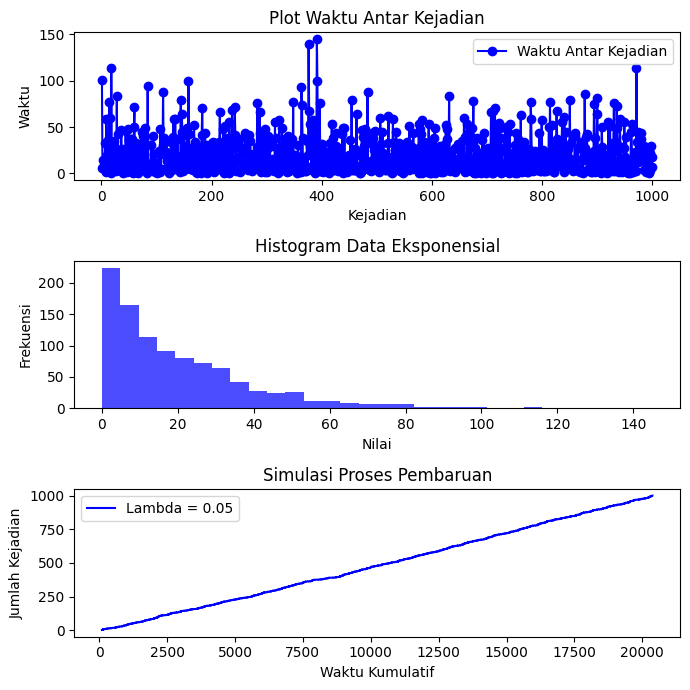

Bilangan acak uniform:
[0.01 0.77 0.49 0.65 0.78 0.63 0.19 0.94 0.05 0.52 0.38 0.16 0.78 0.02
 0.05 0.37 1.   0.   0.51 0.66 0.38 0.22 0.18 0.66 0.25 0.86 0.4  0.02
 0.81 0.12 0.84 0.28 0.71 0.8  0.53 0.1  0.31 0.27 0.66 0.98 0.74 0.8
 0.7  0.1  0.38 0.91 0.67 0.09 0.38 0.16 0.54 0.46 0.42 0.15 0.16 0.34
 0.99 0.81 0.08 0.03 0.77 0.34 0.19 0.36 0.21 0.97 0.52 0.35 0.24 0.46
 0.79 0.85 0.67 0.11 0.13 0.6  0.7  0.16 0.76 0.09 0.81 0.65 0.98 0.01
 0.79 0.6  0.68 0.73 0.69 0.22 0.58 0.73 0.65 0.13 0.78 0.34 0.79 0.92
 0.57 0.82 0.97 0.75 0.88 0.29 0.77 0.94 0.09 0.79 0.34 0.27 0.22 0.01
 0.35 0.14 0.35 0.81 0.32 0.36 0.52 0.54 0.33 0.99 0.8  0.47 0.64 0.19
 0.38 0.82 0.18 0.14 0.05 0.16 0.58 0.05 0.71 0.52 0.8  0.16 0.62 0.79
 0.7  0.49 0.93 0.02 0.4  0.04 0.11 0.86 0.13 0.43 0.64 0.23 0.55 0.28
 0.09 0.75 0.41 0.01 0.12 0.34 0.81 0.41 0.26 0.69 0.59 0.26 0.82 0.08
 0.18 0.69 0.95 0.22 0.98 0.84 0.31 0.44 0.51 0.77 0.3  0.99 0.24 0.13
 0.03 0.27 0.51 0.28 0.81 0.11 0.29 0.22 0.96 0.31 0.37

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
lambda_eks = 0.05  # Parameter laju eksponensial
n = 1000             # Jumlah data yang akan dihasilkan

# Generate data uniform dari 0 ke 1
U = np.random.uniform(0, 1, n)

# Transformasi menjadi data eksponensial
X = -np.log(U) / lambda_eks

# Proses pembaruan
renewal_times = np.cumsum(X)
events = np.arange(1, n + 1)

# Buat sub-grafik
fig, axs = plt.subplots(3, 1, figsize=(7, 7), tight_layout=True)

# Sub-grafik 1: Proses Renewal
axs[2].step(renewal_times, events, where="post", label="Lambda = 0.05", color="blue")
axs[2].set_title("Simulasi Proses Pembaruan")
axs[2].set_xlabel("Waktu Kumulatif")
axs[2].set_ylabel("Jumlah Kejadian")
axs[2].legend()

# Sub-grafik 2: Histogram Data Eksponensial
axs[1].hist(X, bins=30, alpha=0.7, color='blue')
axs[1].set_title("Histogram Data Eksponensial")
axs[1].set_xlabel("Nilai")
axs[1].set_ylabel("Frekuensi")

# Sub-grafik 3: Plot Nilai X (Waktu Antar Kejadian)
axs[0].plot(events, X, marker='o', linestyle='-', color='blue', label="Waktu Antar Kejadian")
axs[0].set_title("Plot Waktu Antar Kejadian")
axs[0].set_xlabel("Kejadian")
axs[0].set_ylabel("Waktu")
axs[0].legend()

# Tampilkan grafik
plt.show()

# Menampilkan data
print("Bilangan acak uniform:")
print(U.round(2))
print("\nWaktu antar kejadian:")
print(X.round(2))
print("\nWaktu kumulatif kejadian:")
print(renewal_times.round(2))

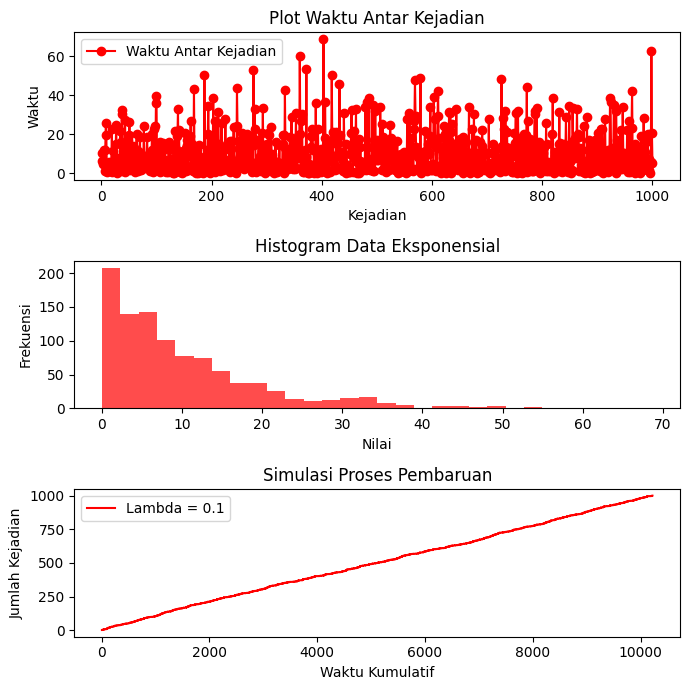

Bilangan acak uniform:
[0.53 0.35 0.62 0.31 0.61 0.87 0.31 0.08 0.14 0.94 0.83 0.75 0.62 0.56
 0.88 0.6  0.77 0.77 0.1  0.91 0.32 0.76 0.7  0.48 0.42 0.22 0.08 0.98
 0.84 0.53 0.5  0.47 0.85 0.11 0.2  0.9  0.05 0.04 0.6  0.41 0.53 0.92
 0.06 0.85 0.55 0.43 0.22 0.18 0.31 0.14 0.07 0.83 0.44 0.58 0.36 0.61
 0.24 0.28 0.34 0.27 0.93 0.64 0.61 0.13 0.8  0.89 0.32 0.67 0.33 0.15
 0.84 0.79 0.8  0.39 0.72 0.73 0.09 0.52 0.51 0.55 0.41 0.43 0.15 0.61
 0.4  0.47 0.72 0.69 0.91 0.46 0.3  0.13 0.92 0.67 0.1  0.88 0.09 0.44
 0.03 0.02 0.74 0.65 0.29 0.47 0.43 0.21 0.94 0.87 0.37 0.72 0.22 0.26
 0.75 0.82 0.29 0.5  0.87 0.95 0.65 0.85 0.95 0.2  0.8  0.71 0.28 0.54
 0.47 0.47 0.53 0.98 0.28 1.   0.91 0.11 0.51 0.29 0.7  0.15 0.04 0.63
 0.11 0.95 0.8  0.74 0.37 1.   0.51 0.8  0.32 0.77 0.77 0.13 0.89 0.28
 0.18 0.23 0.83 0.73 0.42 0.15 0.26 0.07 0.39 0.22 0.36 0.89 0.62 0.01
 0.58 0.37 0.99 0.82 0.67 0.3  0.98 0.39 0.72 0.23 0.52 0.93 0.46 0.59
 0.68 0.65 0.99 0.85 0.01 0.43 0.41 0.46 0.59 0.43 0.1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
lambda_eks = 0.1  # Parameter laju eksponensial
n = 1000             # Jumlah data yang akan dihasilkan

# Generate data uniform dari 0 ke 1
U = np.random.uniform(0, 1, n)

# Transformasi menjadi data eksponensial
X = -np.log(U) / lambda_eks

# Proses pembaruan
renewal_times = np.cumsum(X)
events = np.arange(1, n + 1)

# Buat sub-grafik
fig, axs = plt.subplots(3, 1, figsize=(7, 7), tight_layout=True)

# Sub-grafik 1: Proses Renewal
axs[2].step(renewal_times, events, where="post", label="Lambda = 0.1", color="red")
axs[2].set_title("Simulasi Proses Pembaruan")
axs[2].set_xlabel("Waktu Kumulatif")
axs[2].set_ylabel("Jumlah Kejadian")
axs[2].legend()

# Sub-grafik 2: Histogram Data Eksponensial
axs[1].hist(X, bins=30, alpha=0.7, color='red')
axs[1].set_title("Histogram Data Eksponensial")
axs[1].set_xlabel("Nilai")
axs[1].set_ylabel("Frekuensi")

# Sub-grafik 3: Plot Nilai X (Waktu Antar Kejadian)
axs[0].plot(events, X, marker='o', linestyle='-', color='red', label="Waktu Antar Kejadian")
axs[0].set_title("Plot Waktu Antar Kejadian")
axs[0].set_xlabel("Kejadian")
axs[0].set_ylabel("Waktu")
axs[0].legend()

# Tampilkan grafik
plt.show()

# Menampilkan data
print("Bilangan acak uniform:")
print(U.round(2))
print("\nWaktu antar kejadian:")
print(X.round(2))
print("\nWaktu kumulatif kejadian:")
print(renewal_times.round(2))

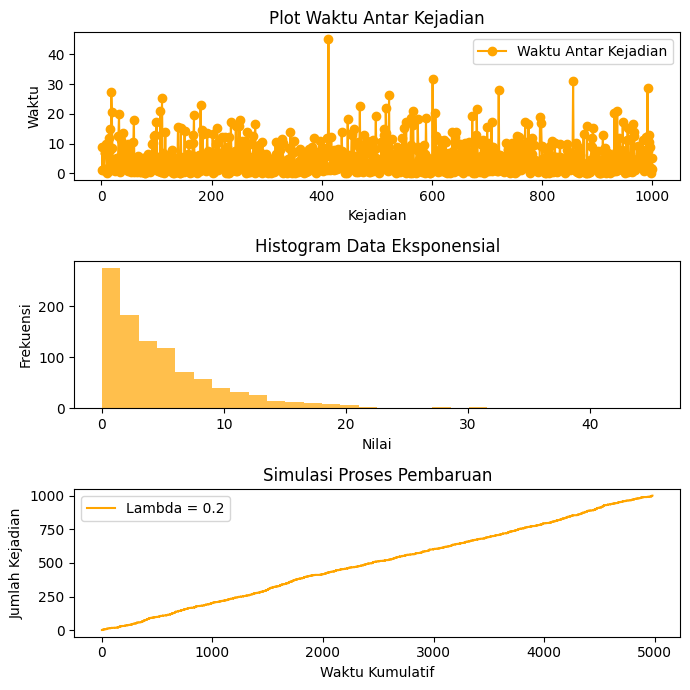

Bilangan acak uniform:
[0.78 0.17 0.78 0.75 0.77 0.26 0.25 0.14 0.22 0.77 0.95 0.7  0.09 0.86
 0.05 0.21 0.61 0.   0.02 0.18 0.48 0.65 0.57 0.37 0.85 0.45 0.8  0.36
 0.37 0.68 0.08 0.02 0.61 0.93 0.4  0.11 0.25 0.18 0.66 0.07 0.19 0.66
 0.6  0.33 0.66 0.44 0.58 0.84 0.14 0.29 0.16 0.77 0.55 0.94 0.69 0.72
 0.36 0.12 0.03 0.94 0.39 0.45 0.63 0.87 0.89 0.34 0.31 0.86 0.65 0.91
 0.89 0.44 0.49 0.47 0.94 0.35 0.37 0.35 0.99 0.97 0.79 0.81 0.42 0.26
 0.72 0.54 0.42 0.66 0.94 0.36 0.79 0.13 0.13 0.52 0.08 0.68 0.45 0.08
 0.38 0.03 0.6  0.61 0.85 0.32 0.75 0.62 0.02 0.91 0.88 0.01 0.25 0.28
 0.98 0.35 0.52 0.06 0.76 0.72 0.34 0.75 0.4  0.63 0.61 0.51 0.85 0.51
 0.26 0.2  0.69 0.98 0.59 0.97 0.88 0.75 0.35 0.82 0.88 0.46 0.04 0.41
 0.82 0.98 0.99 0.05 0.32 0.5  0.75 0.79 0.45 0.91 0.06 0.87 0.77 0.76
 0.32 0.54 0.53 0.26 0.14 0.61 0.98 0.37 0.53 0.93 0.3  0.07 0.13 0.02
 0.69 0.34 0.72 0.58 0.47 0.97 0.77 0.4  0.64 0.29 0.84 0.01 0.59 0.05
 0.34 0.07 0.68 0.6  0.37 0.34 0.5  0.85 0.29 0.07 0.2

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
lambda_eks = 0.2  # Parameter laju eksponensial
n = 1000             # Jumlah data yang akan dihasilkan

# Generate data uniform dari 0 ke 1
U = np.random.uniform(0, 1, n)

# Transformasi menjadi data eksponensial
X = -np.log(U) / lambda_eks

# Proses pembaruan
renewal_times = np.cumsum(X)
events = np.arange(1, n + 1)

# Buat sub-grafik
fig, axs = plt.subplots(3, 1, figsize=(7, 7), tight_layout=True)

# Sub-grafik 1: Proses Renewal
axs[2].step(renewal_times, events, where="post", label="Lambda = 0.2", color="orange")
axs[2].set_title("Simulasi Proses Pembaruan")
axs[2].set_xlabel("Waktu Kumulatif")
axs[2].set_ylabel("Jumlah Kejadian")
axs[2].legend()

# Sub-grafik 2: Histogram Data Eksponensial
axs[1].hist(X, bins=30, alpha=0.7, color='orange')
axs[1].set_title("Histogram Data Eksponensial")
axs[1].set_xlabel("Nilai")
axs[1].set_ylabel("Frekuensi")

# Sub-grafik 3: Plot Nilai X (Waktu Antar Kejadian)
axs[0].plot(events, X, marker='o', linestyle='-', color='orange', label="Waktu Antar Kejadian")
axs[0].set_title("Plot Waktu Antar Kejadian")
axs[0].set_xlabel("Kejadian")
axs[0].set_ylabel("Waktu")
axs[0].legend()

# Tampilkan grafik
plt.show()

# Menampilkan data
print("Bilangan acak uniform:")
print(U.round(2))
print("\nWaktu antar kejadian:")
print(X.round(2))
print("\nWaktu kumulatif kejadian:")
print(renewal_times.round(2))

Waktu Kumulatif Laki-laki: [ 1  3  6 10 15 21 28 36 45 56]
Waktu Kumulatif Perempuan: [ 1  3  6 10 15 21 28 36 46 57 70 85]
Rata-rata waktu antar kejadian Laki-laki: 5.6
Rata-rata waktu antar kejadian Perempuan: 7.083333333333333
λ Laki-laki: 0.18
λ Perempuan: 0.14
CDF Laki-laki:
[0.16353569 0.4147489  0.65748114 0.83232275 0.93133883 0.97648225
 0.99326205 0.99838524 0.99967631 0.9999546 ]
CDF Perempuan:
[0.13166394 0.34526808 0.57132611 0.75628718 0.87968561 0.94842436
 0.98080185 0.99379471 0.99848769 0.99967996 0.99994893 0.99999386]
Kesintasan Laki-laki:
[0.83646431 0.69967254 0.5852511  0.48954166 0.40948413 0.34251886
 0.2865048  0.23965104 0.20045954 0.14025603]
Kesintasan Perempuan:
[0.86833606 0.75400752 0.65473192 0.56852734 0.49367279 0.42867389
 0.37223299 0.32322333 0.24371282 0.21162463 0.15956656 0.12031439]


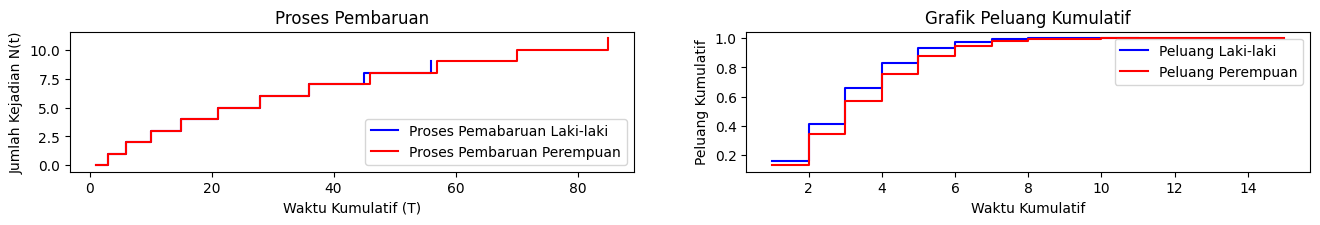

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data waktu antar kejadian dan jumlah kejadian untuk laki-laki dan perempuan
waktu_laki_laki = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 11])
jumlah_kejadian_laki_laki = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

waktu_perempuan = np.array([1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15])
jumlah_kejadian_perempuan = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Menghitung waktu kumulatif (renewal time) untuk laki-laki dan perempuan
renewal_time_laki_laki = np.cumsum(waktu_laki_laki)
renewal_time_perempuan = np.cumsum(waktu_perempuan)

# Menghitung rata-rata waktu antar kejadian (mean time between events)
mean_laki_laki = np.mean(waktu_laki_laki)
mean_perempuan = np.mean(waktu_perempuan)

# Menghitung λ untuk laki-laki dan perempuan
lambda_laki_laki = 1 / mean_laki_laki
lambda_perempuan = 1 / mean_perempuan

# Menghitung fungsi CDF eksponensial
cdf_laki_laki = 1 - np.exp(-lambda_laki_laki * renewal_time_laki_laki)
cdf_perempuan = 1 - np.exp(-lambda_perempuan * renewal_time_perempuan)

# Menghitung kesintasan
survival_laki_laki = np.exp(-lambda_laki_laki * waktu_laki_laki)
survival_perempuan = np.exp(-lambda_perempuan * waktu_perempuan)

# Menampilkan data
print("Waktu Kumulatif Laki-laki:", renewal_time_laki_laki)
print("Waktu Kumulatif Perempuan:", renewal_time_perempuan)
print("Rata-rata waktu antar kejadian Laki-laki:", mean_laki_laki)
print("Rata-rata waktu antar kejadian Perempuan:", mean_perempuan)
print("λ Laki-laki:", lambda_laki_laki.round(2))
print("λ Perempuan:", lambda_perempuan.round(2))
print("CDF Laki-laki:")
print(cdf_laki_laki)
print("CDF Perempuan:")
print(cdf_perempuan)
print("Kesintasan Laki-laki:")
print(survival_laki_laki)
print("Kesintasan Perempuan:")
print(survival_perempuan)

plt.figure(figsize=(16, 4))

# Plot Proses Renewal
plt.subplot(2, 2, 1)
plt.step(renewal_time_laki_laki, np.arange(len(renewal_time_laki_laki)), where="post", label="Proses Pemabaruan Laki-laki", color='b')
plt.step(renewal_time_perempuan, np.arange(len(renewal_time_perempuan)), where="post", label="Proses Pembaruan Perempuan", color='r')
plt.title("Proses Pembaruan")
plt.xlabel("Waktu Kumulatif (T)")
plt.ylabel("Jumlah Kejadian N(t)")
plt.legend()

# Plot CDF
plt.subplot(2, 2, 2)
plt.step(waktu_laki_laki, cdf_laki_laki, where="post", label="Peluang Laki-laki", color='b')
plt.step(waktu_perempuan, cdf_perempuan, where="post", label="Peluang Perempuan", color='r')
plt.title("Grafik Peluang Kumulatif")
plt.xlabel("Waktu Kumulatif")
plt.ylabel("Peluang Kumulatif")
plt.legend()

plt.show()

Waktu Kumulatif Laki-laki: [ 1  3  6 10 15 21 28 36 45 55 66 79 94]
Waktu Kumulatif Perempuan: [ 1  4  8 13 20 28 38 49]
Jumlah Kejadian Laki-laki: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Jumlah Kejadian Perempuan: [1 2 3 4 5 6 7 8]
Rata-rata waktu antar kejadian Laki-laki: 7.230769230769231
Rata-rata waktu antar kejadian Perempuan: 6.125
λ Laki-laki: 0.14
λ Perempuan: 0.16
CDF Laki-laki:
[0.12916075 0.24163899 0.33958947 0.42488858 0.4991704  0.56385793
 0.62019036 0.66924686 0.71196718 0.74916971 0.78156714 0.83434904
 0.87437677]
CDF Perempuan:
[0.15063418 0.38724857 0.47954988 0.55794746 0.68109344 0.72913167
 0.80458955 0.83402504]
Kesintasan Laki-laki:
[0.87083925 0.75836101 0.66041053 0.57511142 0.5008296  0.43614207
 0.37980964 0.33075314 0.28803282 0.25083029 0.21843286 0.16565096
 0.12562323]
Kesintasan Perempuan:
[0.84936582 0.61275143 0.52045012 0.44205254 0.31890656 0.27086833
 0.19541045 0.16597496]


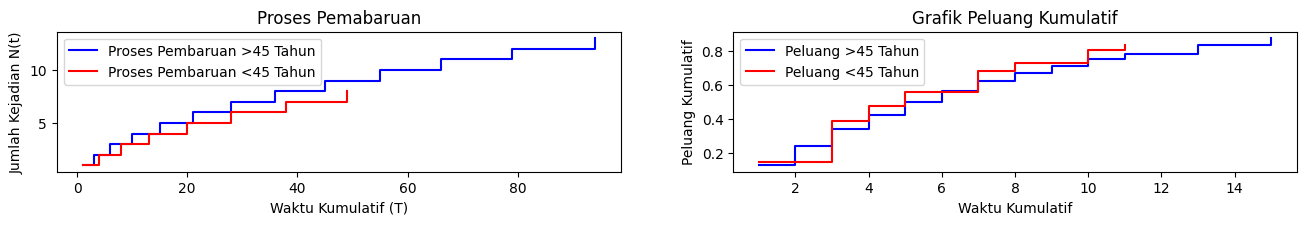

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data waktu antar kejadian dan jumlah kejadian untuk laki-laki dan perempuan
waktu_laki_laki = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15])
jumlah_kejadian_laki_laki = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

waktu_perempuan = np.array([1, 3, 4, 5, 7, 8, 10, 11])
jumlah_kejadian_perempuan = np.array([1, 1, 1, 1, 1, 1, 1, 1])

# Menghitung waktu kumulatif (renewal time) untuk laki-laki dan perempuan
renewal_time_laki_laki = np.cumsum(waktu_laki_laki)
renewal_time_perempuan = np.cumsum(waktu_perempuan)

# Jumlah kejadian
events_laki_laki = np.cumsum(jumlah_kejadian_laki_laki)
events_perempuan = np.cumsum(jumlah_kejadian_perempuan)

# Menghitung rata-rata waktu antar kejadian (mean time between events)
mean_laki_laki = np.mean(waktu_laki_laki)
mean_perempuan = np.mean(waktu_perempuan)

# Menghitung λ untuk laki-laki dan perempuan
lambda_laki_laki = 1 / mean_laki_laki
lambda_perempuan = 1 / mean_perempuan

# Menghitung fungsi CDF eksponensial
cdf_laki_laki = 1 - np.exp(-lambda_laki_laki * waktu_laki_laki)
cdf_perempuan = 1 - np.exp(-lambda_perempuan * waktu_perempuan)

# Menghitung kesintasan
survival_laki_laki = np.exp(-lambda_laki_laki * waktu_laki_laki)
survival_perempuan = np.exp(-lambda_perempuan * waktu_perempuan)

# Menampilkan data
print("Waktu Kumulatif Laki-laki:", renewal_time_laki_laki)
print("Waktu Kumulatif Perempuan:", renewal_time_perempuan)
print("Jumlah Kejadian Laki-laki:", events_laki_laki)
print("Jumlah Kejadian Perempuan:", events_perempuan)
print("Rata-rata waktu antar kejadian Laki-laki:", mean_laki_laki)
print("Rata-rata waktu antar kejadian Perempuan:", mean_perempuan)
print("λ Laki-laki:", lambda_laki_laki.round(2))
print("λ Perempuan:", lambda_perempuan.round(2))
print("CDF Laki-laki:")
print(cdf_laki_laki)
print("CDF Perempuan:")
print(cdf_perempuan)
print("Kesintasan Laki-laki:")
print(survival_laki_laki)
print("Kesintasan Perempuan:")
print(survival_perempuan)

plt.figure(figsize=(16, 4))

# Plot Proses Renewal
plt.subplot(2, 2, 1)
plt.step(renewal_time_laki_laki, events_laki_laki, where="post", label="Proses Pembaruan >45 Tahun", color='b')
plt.step(renewal_time_perempuan, events_perempuan, where="post", label="Proses Pembaruan <45 Tahun", color='r')
plt.title("Proses Pemabaruan")
plt.xlabel("Waktu Kumulatif (T)")
plt.ylabel("Jumlah Kejadian N(t)")
plt.legend()

# Plot CDF
plt.subplot(2, 2, 2)
plt.step(waktu_laki_laki, cdf_laki_laki, where="post", label="Peluang >45 Tahun", color='b')
plt.step(waktu_perempuan, cdf_perempuan, where="post", label="Peluang <45 Tahun", color='r')
plt.title("Grafik Peluang Kumulatif")
plt.xlabel("Waktu Kumulatif")
plt.ylabel("Peluang Kumulatif")
plt.legend()

plt.show()

Waktu Kumulatif Laki-laki: [ 1  3  6 10 15 21 28 36 45 55 66 79 94]
Waktu Kumulatif Perempuan: [ 1  3  6 10 15 21 28 36 45 55 66]
Jumlah Kejadian Laki-laki: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Jumlah Kejadian Perempuan: [ 1  2  3  4  5  6  7  8  9 10 11]
Rata-rata waktu antar kejadian Laki-laki: 7.230769230769231
Rata-rata waktu antar kejadian Perempuan: 6.0
λ Laki-laki: 0.14
λ Perempuan: 0.17
CDF Laki-laki:
[0.12916075 0.24163899 0.33958947 0.42488858 0.4991704  0.56385793
 0.62019036 0.66924686 0.71196718 0.74916971 0.78156714 0.83434904
 0.87437677]
CDF Perempuan:
[0.15351828 0.28346869 0.39346934 0.48658288 0.56540179 0.63212056
 0.68859678 0.73640286 0.77686984 0.8111244  0.84012025]
Kesintasan Laki-laki:
[8.70839254e-01 6.60410533e-01 4.36142073e-01 2.50830285e-01
 1.25623231e-01 5.47895762e-02 2.08096090e-02 6.88284356e-03
 1.98248483e-03 4.97267236e-04 1.08619504e-04 1.79929253e-05
 2.26032941e-06]
Kesintasan Perempuan:
[8.46481725e-01 6.06530660e-01 3.67879441e-01 1.88875

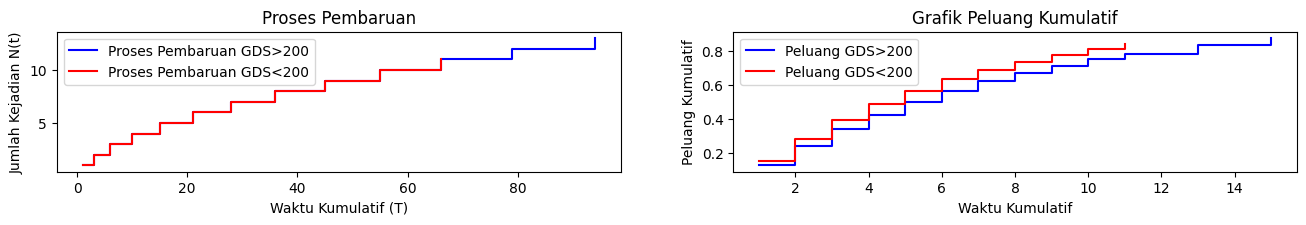

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data waktu antar kejadian dan jumlah kejadian untuk laki-laki dan perempuan
waktu_laki_laki = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15])
jumlah_kejadian_laki_laki = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

waktu_perempuan = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
jumlah_kejadian_perempuan = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Menghitung waktu kumulatif (renewal time) untuk laki-laki dan perempuan
renewal_time_laki_laki = np.cumsum(waktu_laki_laki)
renewal_time_perempuan = np.cumsum(waktu_perempuan)

# Jumlah kejadian
events_laki_laki = np.cumsum(jumlah_kejadian_laki_laki)
events_perempuan = np.cumsum(jumlah_kejadian_perempuan)

# Menghitung rata-rata waktu antar kejadian (mean time between events)
mean_laki_laki = np.mean(waktu_laki_laki)
mean_perempuan = np.mean(waktu_perempuan)

# Menghitung λ untuk laki-laki dan perempuan
lambda_laki_laki = 1 / mean_laki_laki
lambda_perempuan = 1 / mean_perempuan

# Menghitung fungsi CDF eksponensial
cdf_laki_laki = 1 - np.exp(-lambda_laki_laki * waktu_laki_laki)
cdf_perempuan = 1 - np.exp(-lambda_perempuan * waktu_perempuan)

# Menghitung kesintasan
survival_laki_laki = np.exp(-lambda_laki_laki * renewal_time_laki_laki)
survival_perempuan = np.exp(-lambda_perempuan * renewal_time_perempuan)

# Menampilkan data
print("Waktu Kumulatif Laki-laki:", renewal_time_laki_laki)
print("Waktu Kumulatif Perempuan:", renewal_time_perempuan)
print("Jumlah Kejadian Laki-laki:", events_laki_laki)
print("Jumlah Kejadian Perempuan:", events_perempuan)
print("Rata-rata waktu antar kejadian Laki-laki:", mean_laki_laki)
print("Rata-rata waktu antar kejadian Perempuan:", mean_perempuan)
print("λ Laki-laki:", lambda_laki_laki.round(2))
print("λ Perempuan:", lambda_perempuan.round(2))
print("CDF Laki-laki:")
print(cdf_laki_laki)
print("CDF Perempuan:")
print(cdf_perempuan)
print("Kesintasan Laki-laki:")
print(survival_laki_laki)
print("Kesintasan Perempuan:")
print(survival_perempuan)

plt.figure(figsize=(16, 4))

# Plot Proses Renewal
plt.subplot(2, 2, 1)
plt.step(renewal_time_laki_laki, events_laki_laki, where="post", label="Proses Pembaruan GDS>200", color='b')
plt.step(renewal_time_perempuan, events_perempuan, where="post", label="Proses Pembaruan GDS<200", color='r')
plt.title("Proses Pembaruan")
plt.xlabel("Waktu Kumulatif (T)")
plt.ylabel("Jumlah Kejadian N(t)")
plt.legend()

# Plot CDF
plt.subplot(2, 2, 2)
plt.step(waktu_laki_laki, cdf_laki_laki, where="post", label="Peluang GDS>200", color='b')
plt.step(waktu_perempuan, cdf_perempuan, where="post", label="Peluang GDS<200", color='r')
plt.title("Grafik Peluang Kumulatif")
plt.xlabel("Waktu Kumulatif")
plt.ylabel("Peluang Kumulatif")
plt.legend()

plt.show()

Waktu Kumulatif Laki-laki: [ 1  3  6 10 15 21 28 36 45 55 66 79 94]
Waktu Kumulatif Perempuan: [ 1  3  6 10 15 21 28 37 48]
Jumlah Kejadian Laki-laki: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Jumlah Kejadian Perempuan: [1 2 3 4 5 6 7 8 9]
Rata-rata waktu antar kejadian Laki-laki: 7.230769230769231
Rata-rata waktu antar kejadian Perempuan: 5.333333333333333
λ Laki-laki: 0.14
λ Perempuan: 0.19
CDF Laki-laki:
[0.12916075 0.24163899 0.33958947 0.42488858 0.4991704  0.56385793
 0.62019036 0.66924686 0.71196718 0.74916971 0.78156714 0.83434904
 0.87437677]
CDF Perempuan:
[0.17097088 0.31271072 0.43021718 0.52763345 0.60839437 0.67534753
 0.73085365 0.8150186  0.87286427]
Kesintasan Laki-laki:
[0.87083925 0.75836101 0.66041053 0.57511142 0.5008296  0.43614207
 0.37980964 0.33075314 0.28803282 0.25083029 0.21843286 0.16565096
 0.12562323]
Kesintasan Perempuan:
[0.82902912 0.68728928 0.56978282 0.47236655 0.39160563 0.32465247
 0.26914635 0.1849814  0.12713573]


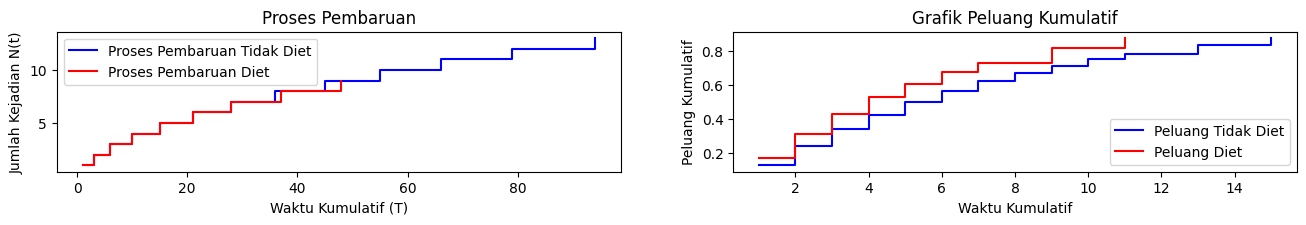

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data waktu antar kejadian dan jumlah kejadian untuk laki-laki dan perempuan
waktu_laki_laki = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15])
jumlah_kejadian_laki_laki = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

waktu_perempuan = np.array([1, 2, 3, 4, 5, 6, 7, 9, 11])
jumlah_kejadian_perempuan = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])

# Menghitung waktu kumulatif (renewal time) untuk laki-laki dan perempuan
renewal_time_laki_laki = np.cumsum(waktu_laki_laki)
renewal_time_perempuan = np.cumsum(waktu_perempuan)

# Jumlah kejadian
events_laki_laki = np.cumsum(jumlah_kejadian_laki_laki)
events_perempuan = np.cumsum(jumlah_kejadian_perempuan)

# Menghitung rata-rata waktu antar kejadian (mean time between events)
mean_laki_laki = np.mean(waktu_laki_laki)
mean_perempuan = np.mean(waktu_perempuan)

# Menghitung λ untuk laki-laki dan perempuan
lambda_laki_laki = 1 / mean_laki_laki
lambda_perempuan = 1 / mean_perempuan

# Menghitung fungsi CDF eksponensial
cdf_laki_laki = 1 - np.exp(-lambda_laki_laki * waktu_laki_laki)
cdf_perempuan = 1 - np.exp(-lambda_perempuan * waktu_perempuan)

# Menghitung kesintasan
survival_laki_laki = np.exp(-lambda_laki_laki * waktu_laki_laki)
survival_perempuan = np.exp(-lambda_perempuan * waktu_perempuan)

# Menampilkan data
print("Waktu Kumulatif Laki-laki:", renewal_time_laki_laki)
print("Waktu Kumulatif Perempuan:", renewal_time_perempuan)
print("Jumlah Kejadian Laki-laki:", events_laki_laki)
print("Jumlah Kejadian Perempuan:", events_perempuan)
print("Rata-rata waktu antar kejadian Laki-laki:", mean_laki_laki)
print("Rata-rata waktu antar kejadian Perempuan:", mean_perempuan)
print("λ Laki-laki:", lambda_laki_laki.round(2))
print("λ Perempuan:", lambda_perempuan.round(2))
print("CDF Laki-laki:")
print(cdf_laki_laki)
print("CDF Perempuan:")
print(cdf_perempuan)
print("Kesintasan Laki-laki:")
print(survival_laki_laki)
print("Kesintasan Perempuan:")
print(survival_perempuan)

plt.figure(figsize=(16, 4))

# Plot Proses Renewal
plt.subplot(2, 2, 1)
plt.step(renewal_time_laki_laki, events_laki_laki, where="post", label="Proses Pembaruan Tidak Diet", color='b')
plt.step(renewal_time_perempuan, events_perempuan, where="post", label="Proses Pembaruan Diet", color='r')
plt.title("Proses Pembaruan")
plt.xlabel("Waktu Kumulatif (T)")
plt.ylabel("Jumlah Kejadian N(t)")
plt.legend()

# Plot CDF
plt.subplot(2, 2, 2)
plt.step(waktu_laki_laki, cdf_laki_laki, where="post", label="Peluang Tidak Diet", color='b')
plt.step(waktu_perempuan, cdf_perempuan, where="post", label="Peluang Diet", color='r')
plt.title("Grafik Peluang Kumulatif")
plt.xlabel("Waktu Kumulatif")
plt.ylabel("Peluang Kumulatif")
plt.legend()

plt.show()

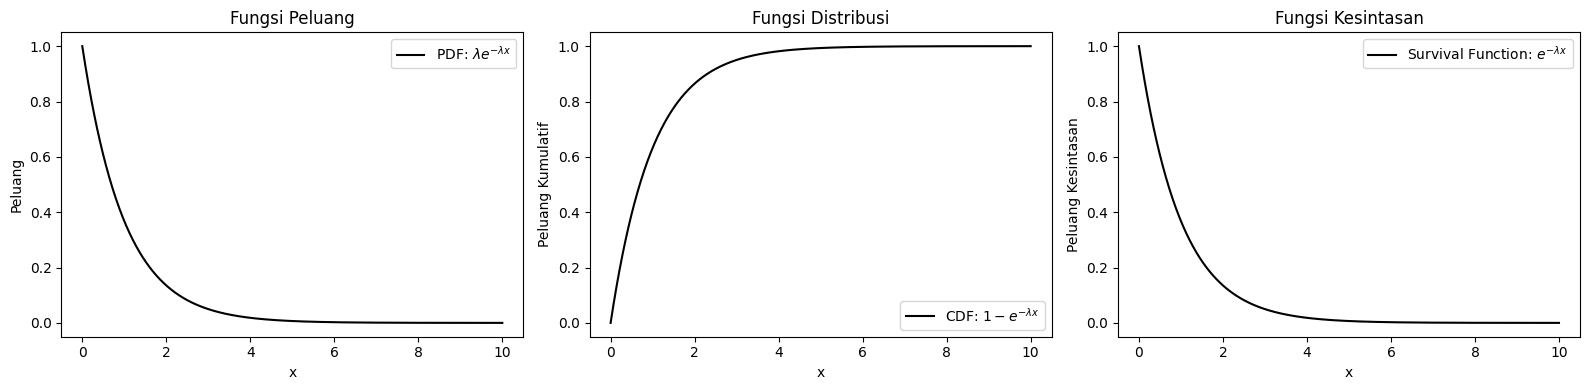

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter distribusi eksponensial
lambda_ = 1  # rate parameter (1/mean)

# Rentang nilai x
x = np.linspace(0, 10, 1000)

# Fungsi kepadatan probabilitas eksponensial (PDF)
pdf = lambda_ * np.exp(-lambda_ * x)

# Fungsi distribusi kumulatif eksponensial (CDF)
cdf = 1 - np.exp(-lambda_ * x)

# Fungsi kesintasan eksponensial (Survival Function)
survival = np.exp(-lambda_ * x)

# Membuat plot
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot PDF
axs[0].plot(x, pdf, label=r'PDF: $\lambda e^{-\lambda x}$', color='black')
axs[0].set_title('Fungsi Peluang')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Peluang')
axs[0].legend()

# Plot CDF
axs[1].plot(x, cdf, label=r'CDF: $1 - e^{-\lambda x}$', color='black')
axs[1].set_title('Fungsi Distribusi')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Peluang Kumulatif')
axs[1].legend()

# Plot Survival Function
axs[2].plot(x, survival, label=r'Survival Function: $e^{-\lambda x}$', color='black')
axs[2].set_title('Fungsi Kesintasan')
axs[2].set_xlabel('x')
axs[2].set_ylabel('Peluang Kesintasan')
axs[2].legend()
# Tampilkan semua grafik
plt.tight_layout()
plt.show()